# Bagian 1: Pengumpulan Data

> ***Esra Frans Sunaryo Purba***

In [105]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [106]:
# Upload file CSV
from google.colab import files
files.upload()

{}

In [118]:
# Load Dataset
df = pd.read_csv('dirty_cafe_sales.csv')

## Eksplorasi Data

> ***Mochammad Chafiedz Afrilian***

In [119]:
# struktur data
print("Dimensi dataset:", df.shape)
print("\nTipe data setiap kolom:")
print(df.dtypes)

print("\nInfo dataset:")
print(df.info())
print(df.head())


Dimensi dataset: (10000, 8)

Tipe data setiap kolom:
Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB
None
  Transaction ID    Item Quantity Price Per Unit Total Spent  Payment Method  \
0    TXN

In [120]:
# statistik deskriptif
print("\nStatistik numerik:")
print(df.describe())


Statistik numerik:
       Transaction ID   Item Quantity Price Per Unit Total Spent  \
count           10000   9667     9862           9821        9827   
unique          10000     10        7              8          19   
top       TXN_9226047  Juice        5            3.0         6.0   
freq                1   1171     2013           2429         979   

        Payment Method  Location Transaction Date  
count             7421      6735             9841  
unique               5         4              367  
top     Digital Wallet  Takeaway          UNKNOWN  
freq              2291      3022              159  


In [121]:
# cek missing value
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())


Jumlah missing values per kolom:
Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64


In [122]:
# cek duplicate data
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 0


## Visualisasi Data Missing Values Sebelum Cleaning
> ***Feby Tri Wulandari***

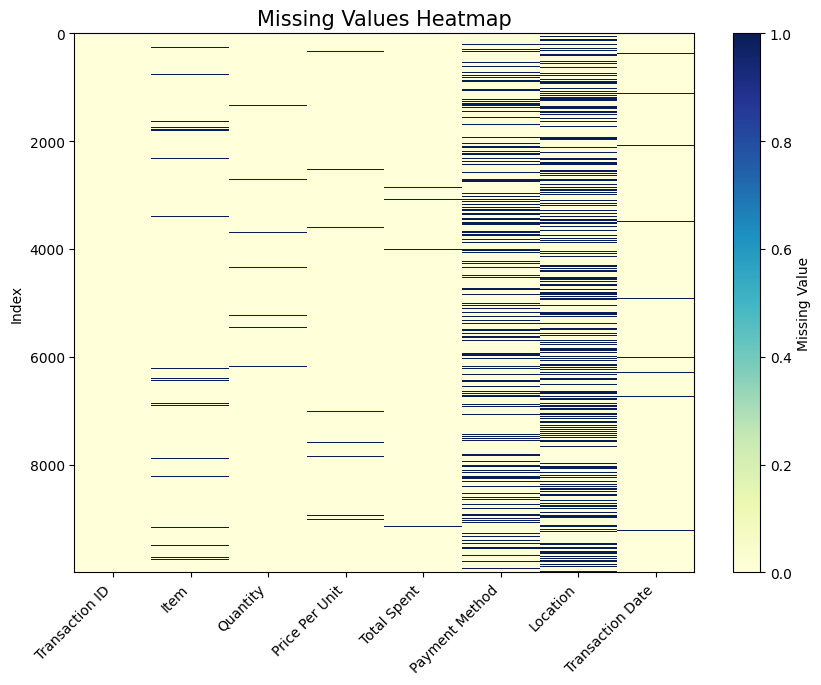

In [123]:
# Visualisasi missing values
plt.figure(figsize=(10,7))
plt.imshow(df.isnull(), cmap='YlGnBu', interpolation='none', aspect='auto')
plt.colorbar(label='Missing Value')
plt.title('Missing Values Heatmap', fontsize=15)
plt.xticks(ticks=np.arange(len(df.columns)), labels=df.columns, rotation=45, ha='right')
plt.ylabel('Index')
plt.show()

# Bagian 2: Pembersihan Data

## Konversi Tipe Data
> ***Nadiyah Shabrina***

In [124]:
# Ubah kolom ke tipe data numerik
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

# Ubah kolom tanggal transaksi menjadi datetime, tidak menggunakkan median
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

print('Tipe data setiap kolom setelah konversi:')
print(df.dtypes)

Tipe data setiap kolom setelah konversi:
Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object


## Penanganan Missing Values

Menghapus atau mengisi missing values dengan teknik yang sesuai (mean, median, interpolasi, atau penghapusan).

> ***Nadiyah Shabrina***

In [125]:
# Data missing value sebelum dilakukan pembersihan data
print('Total missing values: ',df.isnull().sum().sum())
print(df.isna().sum())

Total missing values:  8151
Transaction ID         0
Item                 333
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      2579
Location            3265
Transaction Date     460
dtype: int64


In [126]:
# Mengisi nilai numerik yang hilang/kosong
for col in ['Quantity', 'Price Per Unit', 'Total Spent']:
    df[col].fillna(df[col].median(), inplace=True)

# Hapus baris dengan nilai yang hilang di kolom lainnya
df.dropna(subset=['Item', 'Payment Method', 'Location'], inplace=True)
# Menghapus baris yang memiliki nilai yang hilang di kolom 'Transaction Date'
df.dropna(subset=['Transaction Date'], inplace=True)

# Check hasil akhir
print(df.isna().sum())

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64


/tmp/ipython-input-3497762472.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


## Visualisasi Outliers Sebelum Capping
> ***Feby Tri Wulandari***

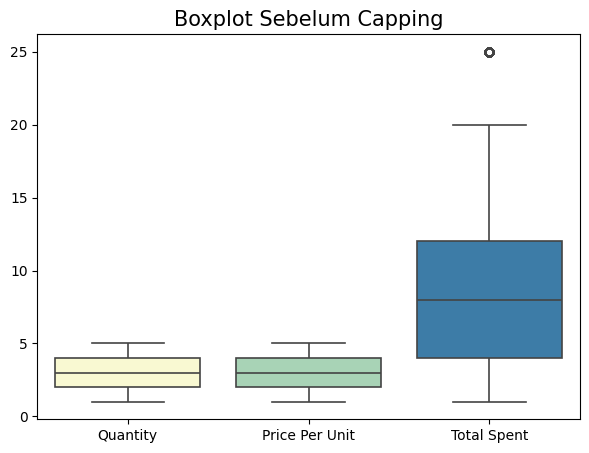

In [127]:
# Distribusi Data Numerik
numerical_cols = ['Quantity', 'Price Per Unit', 'Total Spent']

plt.figure(figsize=(7,5))
sns.boxplot(
    data=df[numerical_cols],
    palette={'Quantity':'#ffffcc', 'Price Per Unit':'#a1dab4', 'Total Spent':'#2c7fb8'},
    linewidth=1.2
)
plt.title("Boxplot Sebelum Capping", fontsize=15)
plt.show()

### Penanganan Outliers

Mengidentifikasi outliers menggunakan metode Boxplot/Z-score/IQR dan menangani outliers yang tidak relevan.

> ***Nadiyah Shabrina***

In [128]:
# Data outliers sebelum dilakukan pembersihan data
numerical_cols = ['Quantity', 'Price Per Unit', 'Total Spent']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(f"{col}: {len(outliers)} outliers")

Total Spent: 127 outliers


In [129]:
# Menggunakan IQR untuk menghilangkan outlier
numerical_cols = ['Quantity', 'Price Per Unit', 'Total Spent']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("Outlier diolah dengan metode pembatasan capping.")
print(f"Capping applied pada kolom {col}: min={df[col].min()}, max={df[col].max()}")

Outlier diolah dengan metode pembatasan capping.
Capping applied pada kolom Total Spent: min=1.0, max=24.0


## Visualisasi Outliers Setelah Capping
> ***Feby Tri Wulandari***

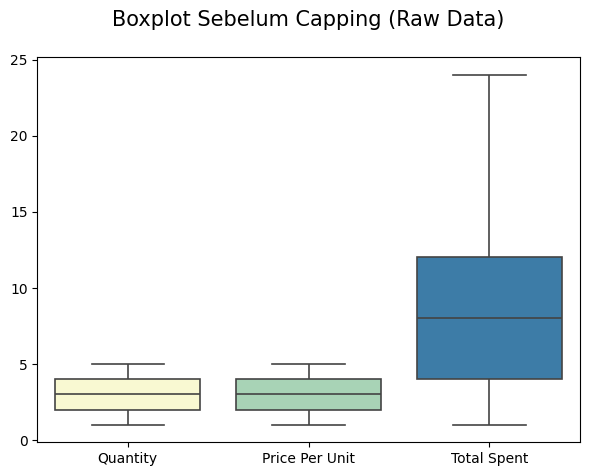

In [130]:
# Distribusi Data Numerik
plt.figure(figsize=(7,5))
sns.boxplot(
    data=df[numerical_cols],
    palette={'Quantity':'#ffffcc', 'Price Per Unit':'#a1dab4', 'Total Spent':'#2c7fb8'},
    linewidth=1.2
)
plt.title("Boxplot Sebelum Capping (Raw Data)\n", fontsize=15)
plt.show()

### Penanganan Redundansi Data (Duplikasi)

Menghapus duplikasi data dan memastikan data tetap konsisten.

> ***Nadiyah Shabrina***

In [131]:
print("Jumlah Jumlah baris duplikat sebelum dihapus:", df.duplicated().sum())

Jumlah Jumlah baris duplikat sebelum dihapus: 0


In [132]:
df.drop_duplicates(inplace=True)
print("Jumlah baris duplikat setelah dihapus:", df.duplicated().sum())

Jumlah baris duplikat setelah dihapus: 0


## Pengecekan terakhir
> ***Nadiyah Shabrina***

In [133]:
print("Missing values setelah dibersihkan:")
display(df.isna().sum())

print("\nValue ranges setelah outlier diolah:")
display(df[['Quantity', 'Price Per Unit', 'Total Spent']].describe())

print("\njumlah baris duplikasi setelah dibersihkan:")
display(df.duplicated().sum())

Missing values setelah dibersihkan:


,0
Transaction ID,0
Item,0
Quantity,0
Price Per Unit,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,0



Value ranges setelah outlier diolah:


,Quantity,Price Per Unit,Total Spent
count,4631.000000,4631.000000,4631.000000
mean,3.023105,2.958864,8.853379
std,1.384621,1.259514,5.825142
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,24.000000



jumlah baris duplikasi setelah dibersihkan:


np.int64(0)

# Bagian 3: Data Preprocessing
> ***Feby Tri Wulandari***

## Cek Anomali Data

Mendeteksi dan menangani nilai anomali pada kolom kategorikal dengan me-*replace* data yang berisi **ERROR** dan **UNKNOWN** menjadi **Other**.

In [134]:
categorical_cols = ['Item', 'Payment Method', 'Location']

# Nilai unik di setiap kolom kategorikal
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Item: ['Coffee' 'Cake' 'Cookie' 'Salad' 'UNKNOWN' 'Sandwich' 'Juice' 'Smoothie'
 'ERROR' 'Tea']
Payment Method: ['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR']
Location: ['Takeaway' 'In-store' 'UNKNOWN' 'ERROR']


In [135]:
# Identifikasi anomali di setiap kolom kategorikal
anomalies = ['UNKNOWN', 'ERROR']

for col in categorical_cols:
    total = len(df[col])
    count_anom = df[col].isin(anomalies).sum()
    percent_anom = (count_anom / total) * 100
    print(f"{col}: {count_anom} data anomali ({percent_anom:.2f}%)")

Item: 305 data anomali (6.59%)
Payment Method: 353 data anomali (7.62%)
Location: 483 data anomali (10.43%)


In [136]:
# Drop baris yang berisi anomali pada kolom Item
before_item = df.shape[0]
df = df[~df['Item'].isin(anomalies)]
after_item = df.shape[0]
print(f"\nItem: {before_item - after_item} baris dihapus "
      f"({((before_item - after_item)/before_item)*100:.2f}%)")


Item: 305 baris dihapus (6.59%)


In [137]:
# Replace anomali menjadi "Other Payment Method" dan "Other Location"
df['Payment Method'] = df['Payment Method'].replace(
    {"ERROR": "Other Payment Method", "UNKNOWN": "Other Payment Method"}
)
df['Location'] = df['Location'].replace(
    {"ERROR": "Other Location", "UNKNOWN": "Other Location"}
)

In [140]:
# Cek sisa anomali setelah cleaning
for col in categorical_cols:
    total = len(df[col])
    count_anom = df[col].isin(anomalies).sum()
    percent_anom = (count_anom / total) * 100
    if count_anom == 0:
        print(f"{col}: Tidak ada data anomali")
    else:
        print(f"{col}: {count_anom} data anomali ({percent_anom:.2f}%)")

Item: Tidak ada data anomali
Payment Method: Tidak ada data anomali
Location: Tidak ada data anomali


## Visualisasi sebelum Preprocessing

<Figure size 1000x700 with 0 Axes>

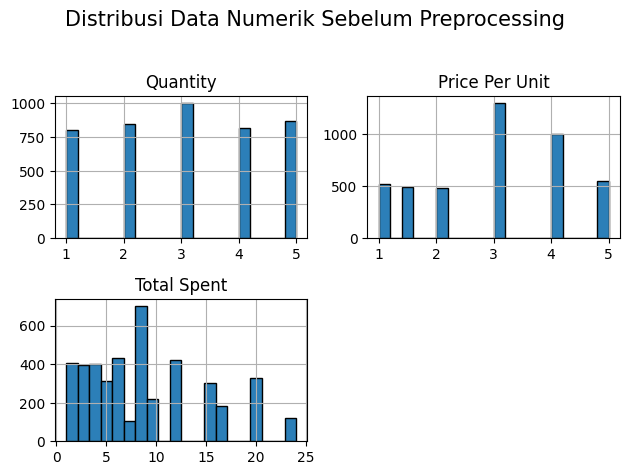

In [141]:
plt.figure(figsize=(10,7))
df[numerical_cols].hist(
    bins=20,
    color='#2c7fb8',
    edgecolor='black'
)
plt.suptitle("Distribusi Data Numerik Sebelum Preprocessing", fontsize=15)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

## Preprocessing

In [142]:
# Encoding Kategorikal
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nKolom setelah encoding:")
print(df_encoded.columns)


Kolom setelah encoding:
Index(['Transaction ID', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Transaction Date', 'Item_Coffee', 'Item_Cookie', 'Item_Juice',
       'Item_Salad', 'Item_Sandwich', 'Item_Smoothie', 'Item_Tea',
       'Payment Method_Credit Card', 'Payment Method_Digital Wallet',
       'Payment Method_Other Payment Method', 'Location_Other Location',
       'Location_Takeaway'],
      dtype='object')


In [143]:
# Normalisasi / Standardisasi Data Numerik
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

print("\nStatistik numerik setelah standardisasi:")
display(df_scaled[numerical_cols].describe().round(2))


Statistik numerik setelah standardisasi:


,Quantity,Price Per Unit,Total Spent
count,4326.00,4326.00,4326.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.46,-1.56,-1.35
25%,-0.74,-0.76,-0.83
50%,-0.02,0.03,-0.15
75%,0.70,0.83,0.54
max,1.42,1.62,2.60


In [144]:
# Reduksi Dimensi (PCA ke 2 komponen utama)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled[numerical_cols])
df_scaled['PCA1'] = pca_result[:, 0]
df_scaled['PCA2'] = pca_result[:, 1]

## Visualisasi setelah Preprocessing

<Figure size 1000x700 with 0 Axes>

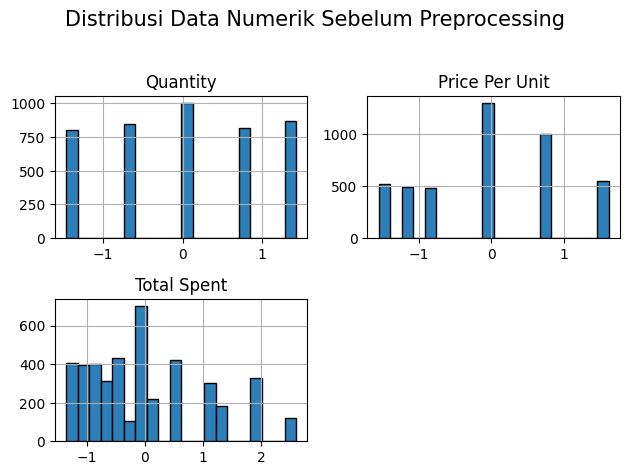

In [145]:
# Histogram setelah scaling
plt.figure(figsize=(10,7))
df_scaled[numerical_cols].hist(
    bins=20,
    color='#2c7fb8',
    edgecolor='black'
)
plt.suptitle("Distribusi Data Numerik Sebelum Preprocessing", fontsize=15)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

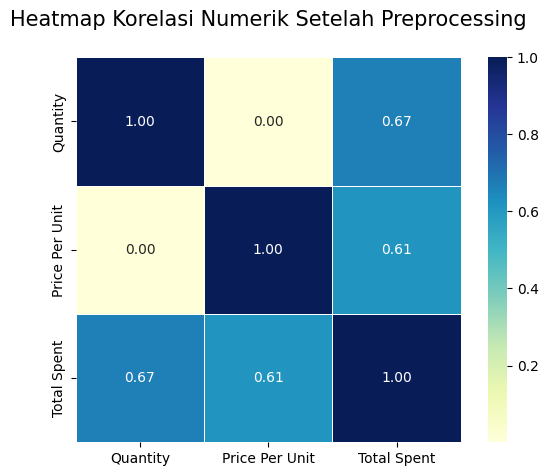

In [146]:
# Heatmap korelasi antar variabel numerik setelah scaling
plt.figure(figsize=(7,5))
sns.heatmap(
    df_scaled[numerical_cols].corr(),
    annot=True, fmt=".2f",
    cmap='YlGnBu',
    linewidths=0.5, square=True
)
plt.title("Heatmap Korelasi Numerik Setelah Preprocessing\n", fontsize=15)
plt.show()

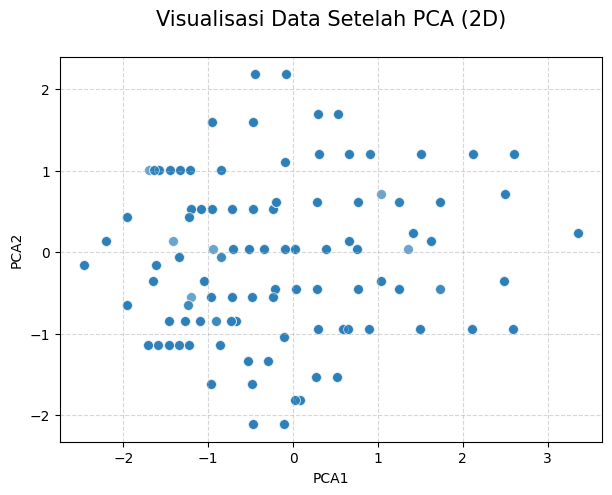

In [147]:
# Scatterplot hasil PCA
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="PCA1", y="PCA2",
    data=df_scaled,
    alpha=0.7,
    s=50,
    color='#2c7fb8'
)
plt.title("Visualisasi Data Setelah PCA (2D)\n", fontsize=15)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()